# library

In [1]:
import sys, os
import scipy.io, numpy
# numpy.set_printoptions(threshold=sys.maxsize)
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")

import numpy as np
import netCDF4
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors as mcolors
import warnings 
warnings.filterwarnings('ignore')

# organic coating thickness

## box plot

In [2]:
directory = "/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nd_log/1_part_res/scenarios"
coating_mean = np.zeros((100,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            sce_index = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename)
            coating_mean[sce_index,:] = ncf.variables["coating_mean"].data*1e9 # m to nm
d_coating = {'coating_mean': coating_mean[:,:].ravel()}
df_coating = pd.DataFrame(data = d_coating)
print(df_coating.shape)
df_coating_2ndngt = df_coating[((df_coating.index.values % 49) >= 37) & ((df_coating.index.values % 49) <= 48)]  # ngt: night
print(df_coating_2ndngt.shape)

(4900, 1)
(1200, 1)


(0.0, 314.5468111479921)

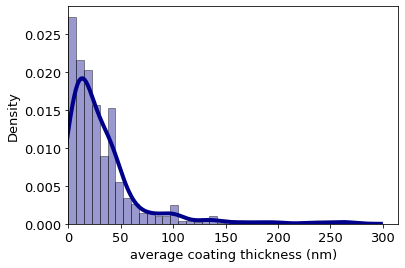

In [3]:
plt.figure(figsize=(13,4))
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = False

plt.subplot(1,2,1)
ax = sns.distplot(df_coating_2ndngt['coating_mean'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});
plt.xlabel(r'average coating thickness (nm)')
plt.xlim(0,)
# plt.yscale('log')

# plt.subplot(1,2,2)
# ax = sns.boxplot(x = "time", y="coating_bar", data=df_coating)

## scatter plot

In [4]:
# no seasalt & dust
gamma_pop = np.zeros((2,100,49))
coating_bar = np.zeros((100,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nd_log/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            # print(filename[-29:-27])
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop[0, sce, :] = ncf.variables["gamma_pop_pr"].data
            gamma_pop[1, sce, :] = ncf.variables["gamma_pop_comp"].data
            coating_bar[sce, :] = ncf.variables["coating_bar"].data
            time = ncf.variables["time"].data/3600

In [5]:
d_gamma_coating = {'gamma_pop_pr': gamma_pop[0, :, :].ravel(),
                   'coating_bar': coating_bar[:,:].ravel()}
df_gamma_coating = pd.DataFrame(data = d_gamma_coating)
print(df_gamma_coating.shape)
df_gamma_coating_2ndngt = df_gamma_coating[((df_gamma_coating.index.values % 49) >= 37) & ((df_gamma_coating.index.values % 49) <= 48)]  # ngt: night
print(df_gamma_coating_2ndngt.shape)

(4900, 2)
(1200, 2)


(0.0015, 0.0205)

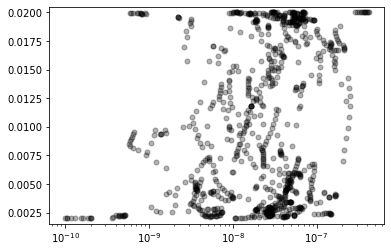

In [6]:
plt.scatter(df_gamma_coating_2ndngt.coating_bar, df_gamma_coating_2ndngt.gamma_pop_pr, s = 25, color = 'k', alpha = 0.3)
plt.xscale('log')
plt.ylim(0.0015,0.0205)

## size distribution

In [24]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nd_log/1_part_res/scenarios'
diam_coating_dist = np.zeros((2,100,49,50,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf = scipy.io.netcdf_file(filename)
            diam_edges = ncf.variables["diam_edges"].data *1e6
            coating_edges = ncf.variables["coating_edges"].data * 1e9
            diam = ncf.variables["diam"].data * 1e6 # m to µm
            diam_coating_dist[0,sce_index, t_index,:,:] = ncf.variables["coating_dist_pr"].data * 1e9 # m to nm
            diam_coating_dist[1,sce_index, t_index,:,:] = ncf.variables["coating_dist_avg"].data * 1e9

[Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)')]

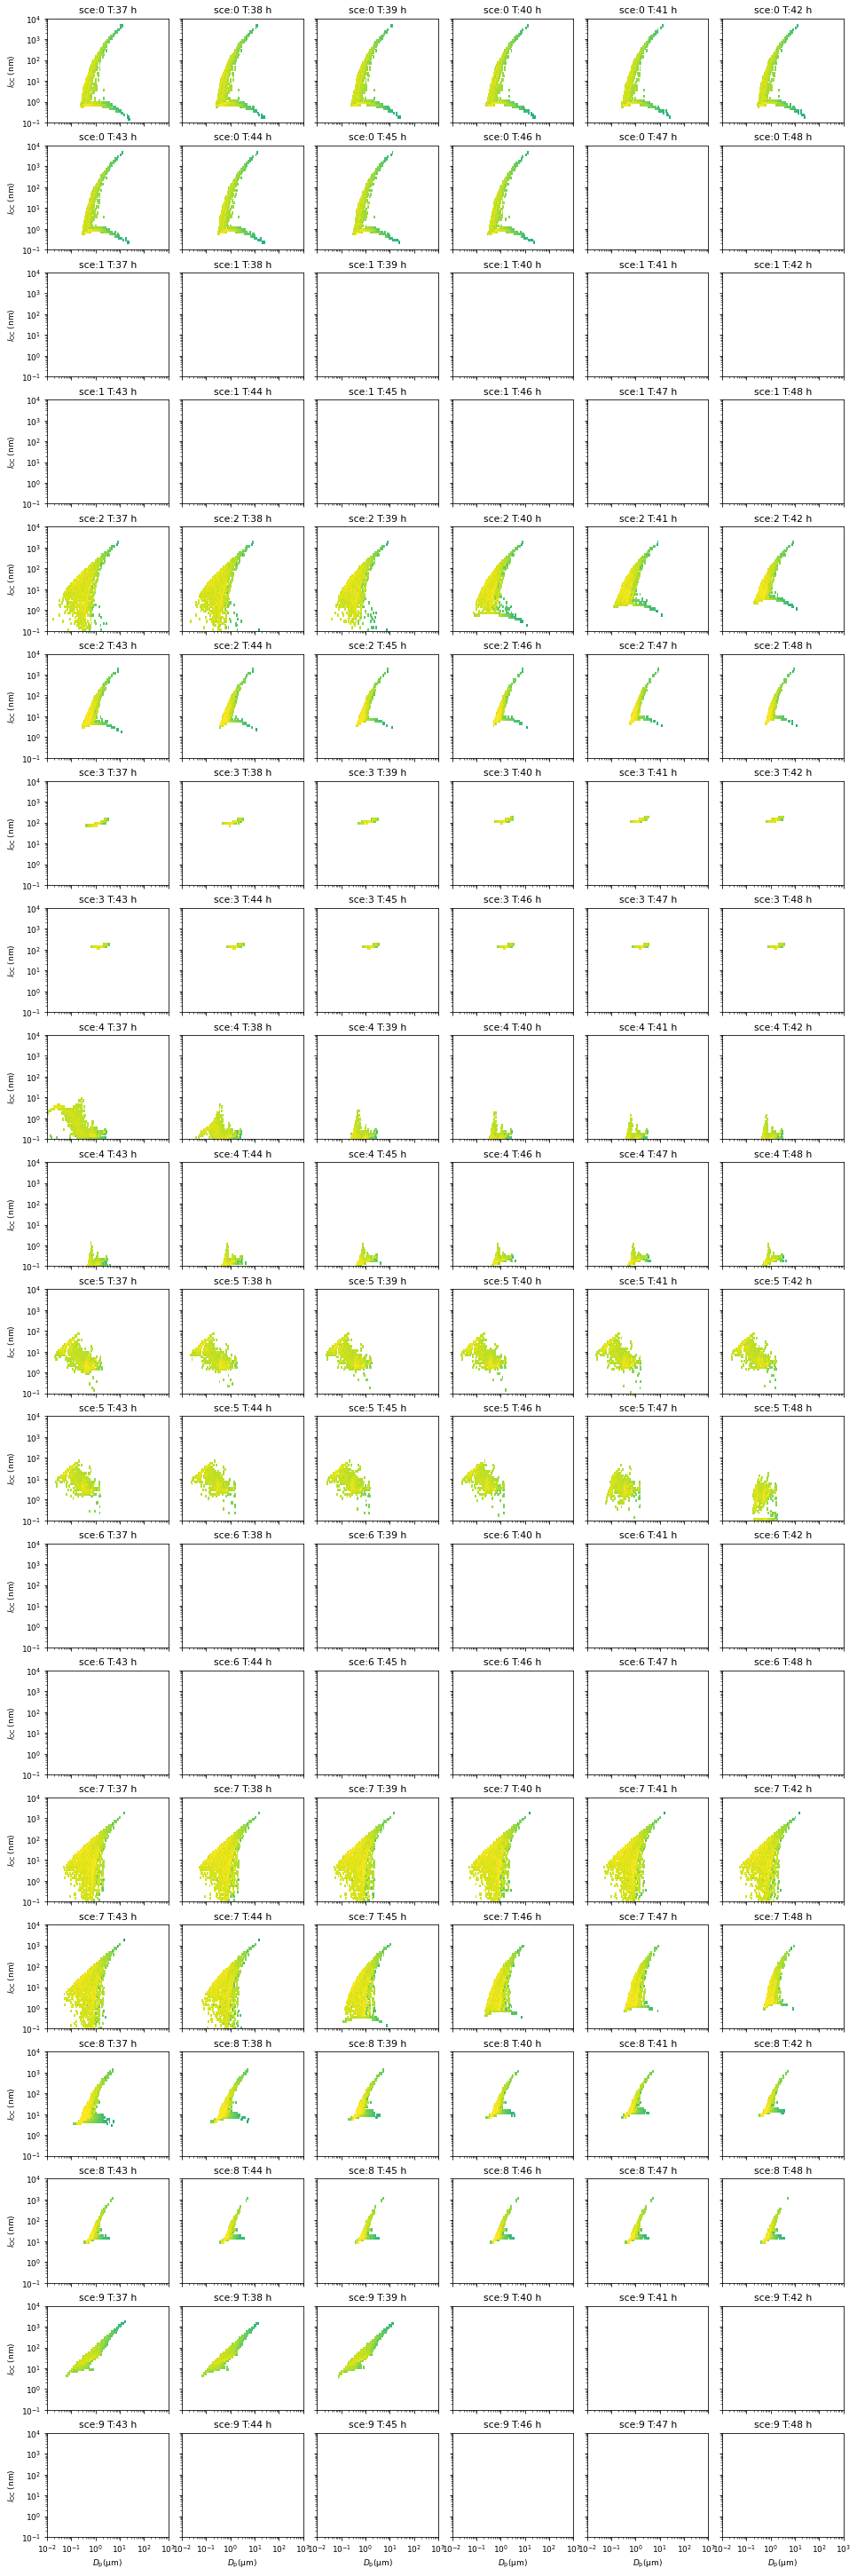

In [25]:
mpl.rcParams['font.size'] = 9
plt.rcParams['text.usetex'] = False

fig, ax = plt.subplots(20,6,figsize=(13,40),sharex = True, sharey = True)
X, Y = np.meshgrid(diam_edges, coating_edges)

for sce in range(10):
    for t in np.arange(37,43,1):
        i = 2 * sce
        p = ax[i,t-37].pcolormesh (X, Y, diam_coating_dist[0, sce, t,:,:], 
                            norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e17), linewidths = 0.1)
        ax[i,t-37].set_xlim(1e-2,1e3)
        ax[i,t-37].set_xscale('log')

        ax[i,t-37].set_ylim(1e-1,1e4)
        # plt.ylabel('coating_dist_pr')
        ax[i,t-37].set_yscale('log')
        ax[i,t-37].set_title(r'sce:%d T:%d h'% (sce, t))
        # ax[0,t-37].grid(True)
        # ax[0,t-37].set_xticks([]); ax[0,t-37].set_yticks([])
    for t in np.arange(43,49,1):
        i = 2 * sce + 1
        p = ax[i,t-43].pcolormesh (X, Y, diam_coating_dist[0, sce, t,:,:], 
                            norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e17), linewidths = 0.1)
        ax[i,t-43].set_xlim(1e-2,1e3)
        ax[i,t-43].set_xscale('log')

        ax[i,t-43].set_ylim(1e-1,1e4)
        ax[i,t-43].set_yscale('log')
        ax[i,t-43].set_title(r'sce:%d T:%d h'% (sce, t))

plt.tight_layout(pad=0.5)
plt.setp(ax[-1, :], xlabel=r'$D_{\rm p} (\rm \mu m)$')
plt.setp(ax[:, 0], ylabel=r'$l_{\rm OC}$ (nm)')

[Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)'),
 Text(83.822265625, 0.5, '$l_{\\rm OC}$ (nm)')]

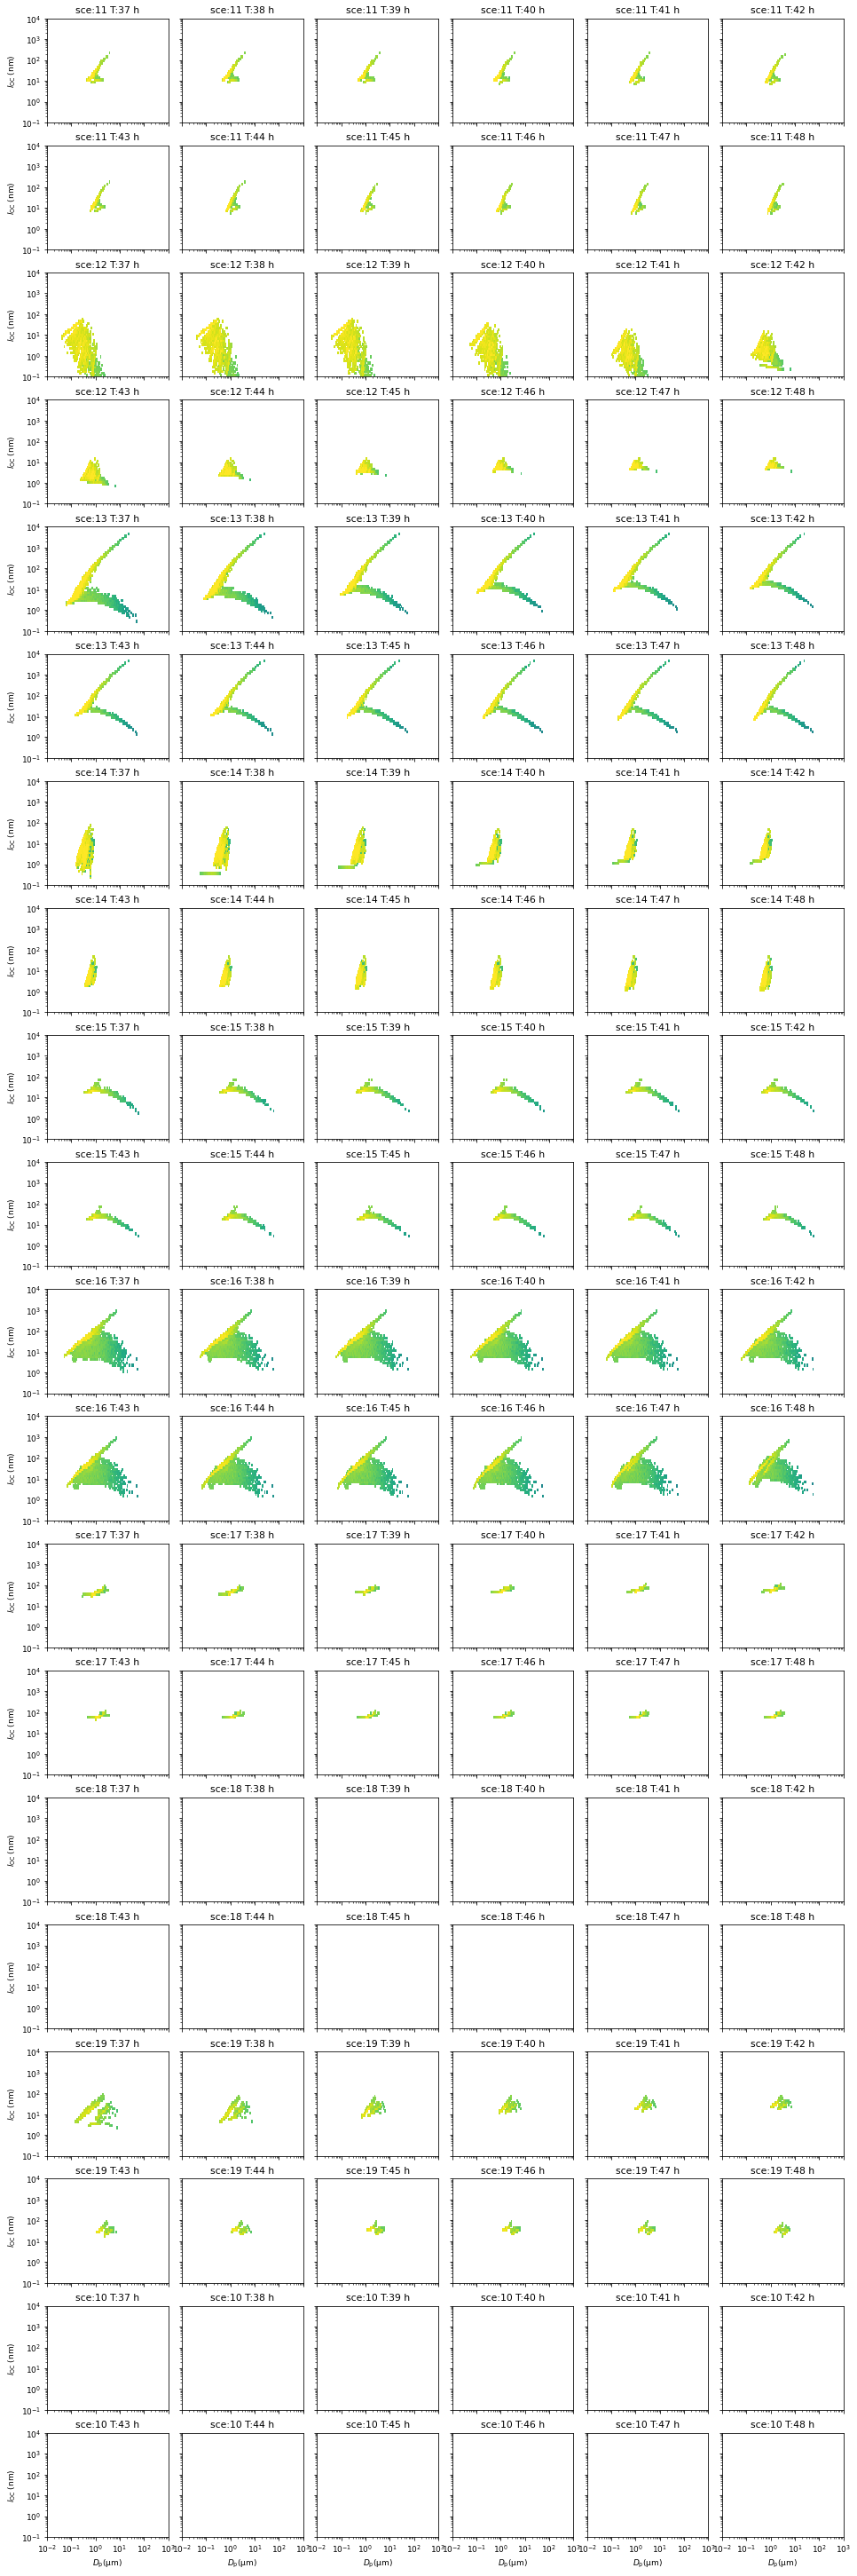

In [26]:
mpl.rcParams['font.size'] = 9
plt.rcParams['text.usetex'] = False

fig, ax = plt.subplots(20,6,figsize=(13,40),sharex = True, sharey = True)
X, Y = np.meshgrid(diam_edges, coating_edges)

for sce in np.arange(10,20,1):
    for t in np.arange(37,43,1):
        i = 2 * (sce-11)
        p = ax[i,t-37].pcolormesh (X, Y, diam_coating_dist[0, sce, t,:,:], 
                            norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e17), linewidths = 0.1)
        ax[i,t-37].set_xlim(1e-2,1e3)
        ax[i,t-37].set_xscale('log')

        ax[i,t-37].set_ylim(1e-1,1e4)
        # plt.ylabel('coating_dist_pr')
        ax[i,t-37].set_yscale('log')
        ax[i,t-37].set_title(r'sce:%d T:%d h'% (sce, t))
        # ax[0,t-37].grid(True)
        # ax[0,t-37].set_xticks([]); ax[0,t-37].set_yticks([])
    for t in np.arange(43,49,1):
        i = 2 * (sce-11) + 1
        p = ax[i,t-43].pcolormesh (X, Y, diam_coating_dist[0, sce, t,:,:], 
                            norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e17), linewidths = 0.1)
        ax[i,t-43].set_xlim(1e-2,1e3)
        ax[i,t-43].set_xscale('log')

        ax[i,t-43].set_ylim(1e-1,1e4)
        ax[i,t-43].set_yscale('log')
        ax[i,t-43].set_title(r'sce:%d T:%d h'% (sce, t))

plt.tight_layout(pad=0.5)
plt.setp(ax[-1, :], xlabel=r'$D_{\rm p} (\rm \mu m)$')
plt.setp(ax[:, 0], ylabel=r'$l_{\rm OC}$ (nm)')

IndexError: index 20 is out of bounds for axis 0 with size 20

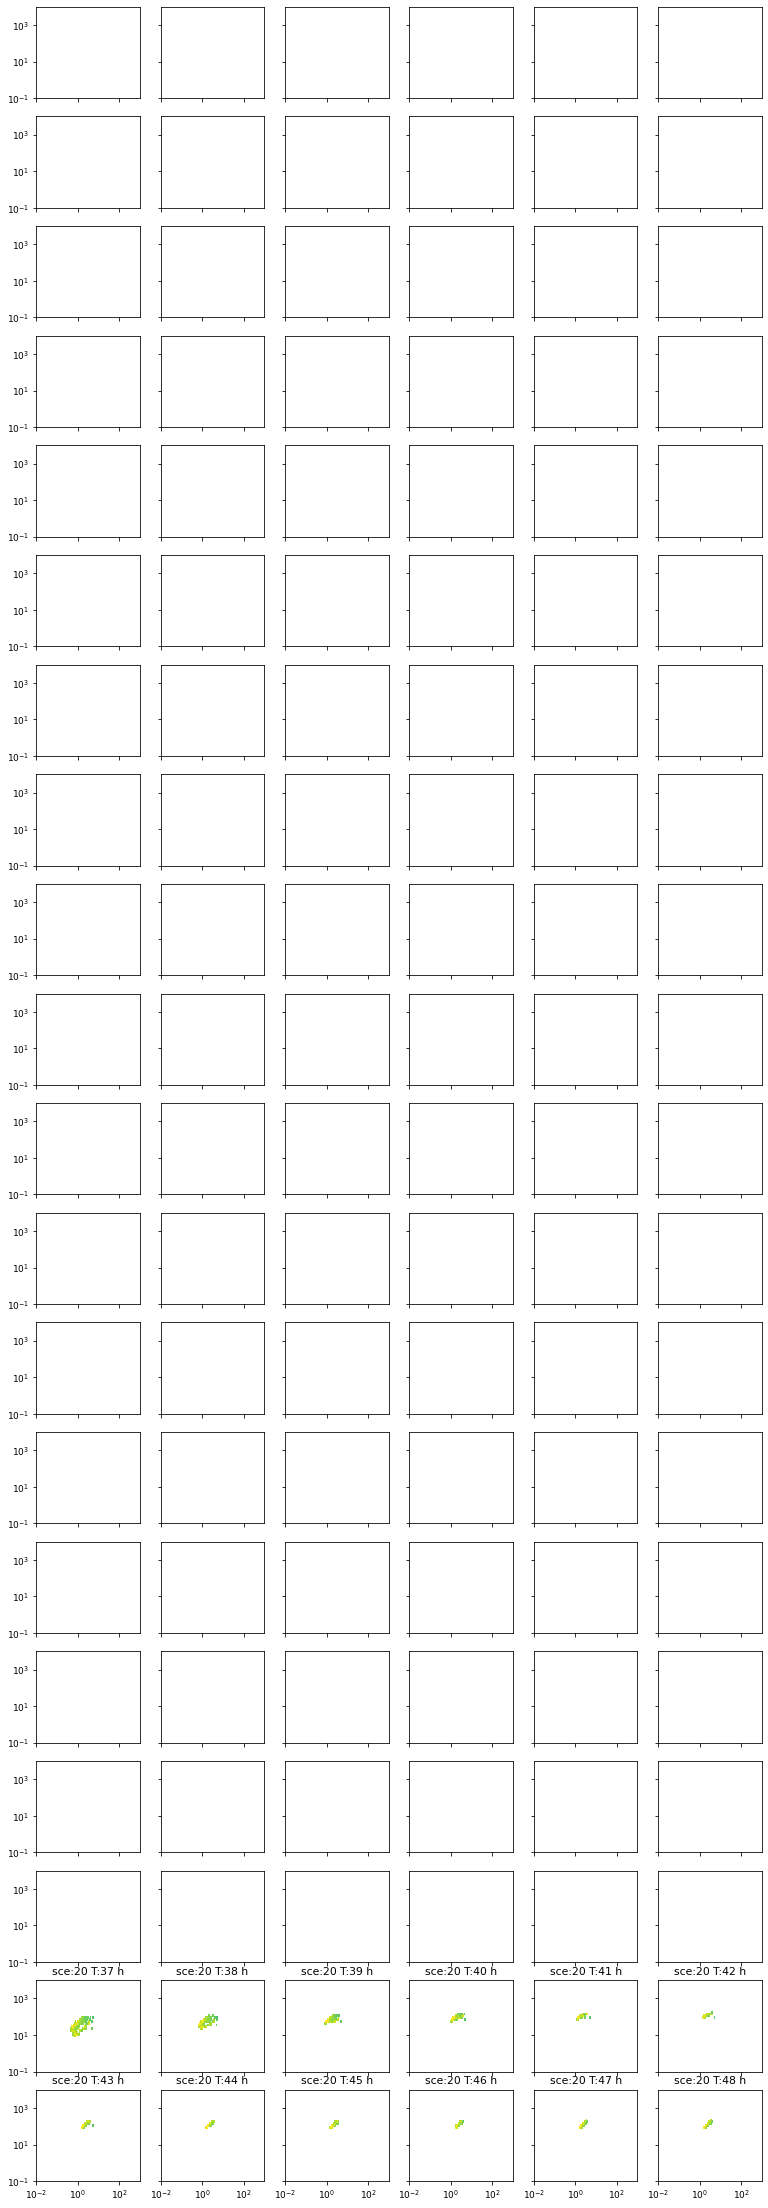

In [27]:
mpl.rcParams['font.size'] = 9
plt.rcParams['text.usetex'] = False

fig, ax = plt.subplots(20,6,figsize=(13,40),sharex = True, sharey = True)
X, Y = np.meshgrid(diam_edges, coating_edges)

for sce in np.arange(20,30,1):
    for t in np.arange(37,43,1):
        i = 2 * (sce-11)
        p = ax[i,t-37].pcolormesh (X, Y, diam_coating_dist[0, sce, t,:,:], 
                            norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e17), linewidths = 0.1)
        ax[i,t-37].set_xlim(1e-2,1e3)
        ax[i,t-37].set_xscale('log')

        ax[i,t-37].set_ylim(1e-1,1e4)
        # plt.ylabel('coating_dist_pr')
        ax[i,t-37].set_yscale('log')
        ax[i,t-37].set_title(r'sce:%d T:%d h'% (sce, t))
        # ax[0,t-37].grid(True)
        # ax[0,t-37].set_xticks([]); ax[0,t-37].set_yticks([])
    for t in np.arange(43,49,1):
        i = 2 * (sce-11) + 1
        p = ax[i,t-43].pcolormesh (X, Y, diam_coating_dist[0, sce, t,:,:], 
                            norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e17), linewidths = 0.1)
        ax[i,t-43].set_xlim(1e-2,1e3)
        ax[i,t-43].set_xscale('log')

        ax[i,t-43].set_ylim(1e-1,1e4)
        ax[i,t-43].set_yscale('log')
        ax[i,t-43].set_title(r'sce:%d T:%d h'% (sce, t))

plt.tight_layout(pad=0.5)
plt.setp(ax[-1, :], xlabel=r'$D_{\rm p} (\rm \mu m)$')
plt.setp(ax[:, 0], ylabel=r'$l_{\rm OC}$ (nm)')

In [ ]:
mpl.rcParams['font.size'] = 9
plt.rcParams['text.usetex'] = False

fig, ax = plt.subplots(20,6,figsize=(13,40),sharex = True, sharey = True)
X, Y = np.meshgrid(diam_edges, coating_edges)

for sce in np.arange(30,40,1):
    for t in np.arange(37,43,1):
        i = 2 * (sce-11)
        p = ax[i,t-37].pcolormesh (X, Y, diam_coating_dist[0, sce, t,:,:], 
                            norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e17), linewidths = 0.1)
        ax[i,t-37].set_xlim(1e-2,1e3)
        ax[i,t-37].set_xscale('log')

        ax[i,t-37].set_ylim(1e-1,1e4)
        # plt.ylabel('coating_dist_pr')
        ax[i,t-37].set_yscale('log')
        ax[i,t-37].set_title(r'sce:%d T:%d h'% (sce, t))
        # ax[0,t-37].grid(True)
        # ax[0,t-37].set_xticks([]); ax[0,t-37].set_yticks([])
    for t in np.arange(43,49,1):
        i = 2 * (sce-11) + 1
        p = ax[i,t-43].pcolormesh (X, Y, diam_coating_dist[0, sce, t,:,:], 
                            norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e17), linewidths = 0.1)
        ax[i,t-43].set_xlim(1e-2,1e3)
        ax[i,t-43].set_xscale('log')

        ax[i,t-43].set_ylim(1e-1,1e4)
        ax[i,t-43].set_yscale('log')
        ax[i,t-43].set_title(r'sce:%d T:%d h'% (sce, t))

plt.tight_layout(pad=0.5)
plt.setp(ax[-1, :], xlabel=r'$D_{\rm p} (\rm \mu m)$')
plt.setp(ax[:, 0], ylabel=r'$l_{\rm OC}$ (nm)')

In [ ]:
mpl.rcParams['font.size'] = 9
plt.rcParams['text.usetex'] = False

fig, ax = plt.subplots(20,6,figsize=(13,40),sharex = True, sharey = True)
X, Y = np.meshgrid(diam_edges, coating_edges)

for sce in np.arange(40,50,1):
    for t in np.arange(37,43,1):
        i = 2 * (sce-11)
        p = ax[i,t-37].pcolormesh (X, Y, diam_coating_dist[0, sce, t,:,:], 
                            norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e17), linewidths = 0.1)
        ax[i,t-37].set_xlim(1e-2,1e3)
        ax[i,t-37].set_xscale('log')

        ax[i,t-37].set_ylim(1e-1,1e4)
        # plt.ylabel('coating_dist_pr')
        ax[i,t-37].set_yscale('log')
        ax[i,t-37].set_title(r'sce:%d T:%d h'% (sce, t))
        # ax[0,t-37].grid(True)
        # ax[0,t-37].set_xticks([]); ax[0,t-37].set_yticks([])
    for t in np.arange(43,49,1):
        i = 2 * (sce-11) + 1
        p = ax[i,t-43].pcolormesh (X, Y, diam_coating_dist[0, sce, t,:,:], 
                            norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e17), linewidths = 0.1)
        ax[i,t-43].set_xlim(1e-2,1e3)
        ax[i,t-43].set_xscale('log')

        ax[i,t-43].set_ylim(1e-1,1e4)
        ax[i,t-43].set_yscale('log')
        ax[i,t-43].set_title(r'sce:%d T:%d h'% (sce, t))

plt.tight_layout(pad=0.5)
plt.setp(ax[-1, :], xlabel=r'$D_{\rm p} (\rm \mu m)$')
plt.setp(ax[:, 0], ylabel=r'$l_{\rm OC}$ (nm)')

In [ ]:
mpl.rcParams['font.size'] = 9
plt.rcParams['text.usetex'] = False

fig, ax = plt.subplots(20,6,figsize=(13,40),sharex = True, sharey = True)
X, Y = np.meshgrid(diam_edges, coating_edges)

for sce in np.arange(50,60,1):
    for t in np.arange(37,43,1):
        i = 2 * (sce-11)
        p = ax[i,t-37].pcolormesh (X, Y, diam_coating_dist[0, sce, t,:,:], 
                            norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e17), linewidths = 0.1)
        ax[i,t-37].set_xlim(1e-2,1e3)
        ax[i,t-37].set_xscale('log')

        ax[i,t-37].set_ylim(1e-1,1e4)
        # plt.ylabel('coating_dist_pr')
        ax[i,t-37].set_yscale('log')
        ax[i,t-37].set_title(r'sce:%d T:%d h'% (sce, t))
        # ax[0,t-37].grid(True)
        # ax[0,t-37].set_xticks([]); ax[0,t-37].set_yticks([])
    for t in np.arange(43,49,1):
        i = 2 * (sce-11) + 1
        p = ax[i,t-43].pcolormesh (X, Y, diam_coating_dist[0, sce, t,:,:], 
                            norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e17), linewidths = 0.1)
        ax[i,t-43].set_xlim(1e-2,1e3)
        ax[i,t-43].set_xscale('log')

        ax[i,t-43].set_ylim(1e-1,1e4)
        ax[i,t-43].set_yscale('log')
        ax[i,t-43].set_title(r'sce:%d T:%d h'% (sce, t))

plt.tight_layout(pad=0.5)
plt.setp(ax[-1, :], xlabel=r'$D_{\rm p} (\rm \mu m)$')
plt.setp(ax[:, 0], ylabel=r'$l_{\rm OC}$ (nm)')

In [ ]:
mpl.rcParams['font.size'] = 9
plt.rcParams['text.usetex'] = False

fig, ax = plt.subplots(20,6,figsize=(13,40),sharex = True, sharey = True)
X, Y = np.meshgrid(diam_edges, coating_edges)

for sce in np.arange(60,70,1):
    for t in np.arange(37,43,1):
        i = 2 * (sce-11)
        p = ax[i,t-37].pcolormesh (X, Y, diam_coating_dist[0, sce, t,:,:], 
                            norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e17), linewidths = 0.1)
        ax[i,t-37].set_xlim(1e-2,1e3)
        ax[i,t-37].set_xscale('log')

        ax[i,t-37].set_ylim(1e-1,1e4)
        # plt.ylabel('coating_dist_pr')
        ax[i,t-37].set_yscale('log')
        ax[i,t-37].set_title(r'sce:%d T:%d h'% (sce, t))
        # ax[0,t-37].grid(True)
        # ax[0,t-37].set_xticks([]); ax[0,t-37].set_yticks([])
    for t in np.arange(43,49,1):
        i = 2 * (sce-11) + 1
        p = ax[i,t-43].pcolormesh (X, Y, diam_coating_dist[0, sce, t,:,:], 
                            norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e17), linewidths = 0.1)
        ax[i,t-43].set_xlim(1e-2,1e3)
        ax[i,t-43].set_xscale('log')

        ax[i,t-43].set_ylim(1e-1,1e4)
        ax[i,t-43].set_yscale('log')
        ax[i,t-43].set_title(r'sce:%d T:%d h'% (sce, t))

plt.tight_layout(pad=0.5)
plt.setp(ax[-1, :], xlabel=r'$D_{\rm p} (\rm \mu m)$')
plt.setp(ax[:, 0], ylabel=r'$l_{\rm OC}$ (nm)')

In [ ]:
mpl.rcParams['font.size'] = 9
plt.rcParams['text.usetex'] = False

fig, ax = plt.subplots(20,6,figsize=(13,40),sharex = True, sharey = True)
X, Y = np.meshgrid(diam_edges, coating_edges)

for sce in np.arange(70,80,1):
    for t in np.arange(37,43,1):
        i = 2 * (sce-11)
        p = ax[i,t-37].pcolormesh (X, Y, diam_coating_dist[0, sce, t,:,:], 
                            norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e17), linewidths = 0.1)
        ax[i,t-37].set_xlim(1e-2,1e3)
        ax[i,t-37].set_xscale('log')

        ax[i,t-37].set_ylim(1e-1,1e4)
        # plt.ylabel('coating_dist_pr')
        ax[i,t-37].set_yscale('log')
        ax[i,t-37].set_title(r'sce:%d T:%d h'% (sce, t))
        # ax[0,t-37].grid(True)
        # ax[0,t-37].set_xticks([]); ax[0,t-37].set_yticks([])
    for t in np.arange(43,49,1):
        i = 2 * (sce-11) + 1
        p = ax[i,t-43].pcolormesh (X, Y, diam_coating_dist[0, sce, t,:,:], 
                            norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e17), linewidths = 0.1)
        ax[i,t-43].set_xlim(1e-2,1e3)
        ax[i,t-43].set_xscale('log')

        ax[i,t-43].set_ylim(1e-1,1e4)
        ax[i,t-43].set_yscale('log')
        ax[i,t-43].set_title(r'sce:%d T:%d h'% (sce, t))

plt.tight_layout(pad=0.5)
plt.setp(ax[-1, :], xlabel=r'$D_{\rm p} (\rm \mu m)$')
plt.setp(ax[:, 0], ylabel=r'$l_{\rm OC}$ (nm)')

In [ ]:
mpl.rcParams['font.size'] = 9
plt.rcParams['text.usetex'] = False

fig, ax = plt.subplots(20,6,figsize=(13,40),sharex = True, sharey = True)
X, Y = np.meshgrid(diam_edges, coating_edges)

for sce in np.arange(80,90,1):
    for t in np.arange(37,43,1):
        i = 2 * (sce-11)
        p = ax[i,t-37].pcolormesh (X, Y, diam_coating_dist[0, sce, t,:,:], 
                            norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e17), linewidths = 0.1)
        ax[i,t-37].set_xlim(1e-2,1e3)
        ax[i,t-37].set_xscale('log')

        ax[i,t-37].set_ylim(1e-1,1e4)
        # plt.ylabel('coating_dist_pr')
        ax[i,t-37].set_yscale('log')
        ax[i,t-37].set_title(r'sce:%d T:%d h'% (sce, t))
        # ax[0,t-37].grid(True)
        # ax[0,t-37].set_xticks([]); ax[0,t-37].set_yticks([])
    for t in np.arange(43,49,1):
        i = 2 * (sce-11) + 1
        p = ax[i,t-43].pcolormesh (X, Y, diam_coating_dist[0, sce, t,:,:], 
                            norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e17), linewidths = 0.1)
        ax[i,t-43].set_xlim(1e-2,1e3)
        ax[i,t-43].set_xscale('log')

        ax[i,t-43].set_ylim(1e-1,1e4)
        ax[i,t-43].set_yscale('log')
        ax[i,t-43].set_title(r'sce:%d T:%d h'% (sce, t))

plt.tight_layout(pad=0.5)
plt.setp(ax[-1, :], xlabel=r'$D_{\rm p} (\rm \mu m)$')
plt.setp(ax[:, 0], ylabel=r'$l_{\rm OC}$ (nm)')

In [ ]:
mpl.rcParams['font.size'] = 9
plt.rcParams['text.usetex'] = False

fig, ax = plt.subplots(20,6,figsize=(13,40),sharex = True, sharey = True)
X, Y = np.meshgrid(diam_edges, coating_edges)

for sce in np.arange(90,100,1):
    for t in np.arange(37,43,1):
        i = 2 * (sce-11)
        p = ax[i,t-37].pcolormesh (X, Y, diam_coating_dist[0, sce, t,:,:], 
                            norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e17), linewidths = 0.1)
        ax[i,t-37].set_xlim(1e-2,1e3)
        ax[i,t-37].set_xscale('log')

        ax[i,t-37].set_ylim(1e-1,1e4)
        # plt.ylabel('coating_dist_pr')
        ax[i,t-37].set_yscale('log')
        ax[i,t-37].set_title(r'sce:%d T:%d h'% (sce, t))
        # ax[0,t-37].grid(True)
        # ax[0,t-37].set_xticks([]); ax[0,t-37].set_yticks([])
    for t in np.arange(43,49,1):
        i = 2 * (sce-11) + 1
        p = ax[i,t-43].pcolormesh (X, Y, diam_coating_dist[0, sce, t,:,:], 
                            norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e17), linewidths = 0.1)
        ax[i,t-43].set_xlim(1e-2,1e3)
        ax[i,t-43].set_xscale('log')

        ax[i,t-43].set_ylim(1e-1,1e4)
        ax[i,t-43].set_yscale('log')
        ax[i,t-43].set_title(r'sce:%d T:%d h'% (sce, t))

plt.tight_layout(pad=0.5)
plt.setp(ax[-1, :], xlabel=r'$D_{\rm p} (\rm \mu m)$')
plt.setp(ax[:, 0], ylabel=r'$l_{\rm OC}$ (nm)')

## table - mean & std

In [2]:
directory = "/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nd_log/1_part_res/scenarios"
coating_mean = np.zeros((100,49))
coating_std = np.zeros((100,49))
pd.set_option('display.max_rows', None)

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            sce_index = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename)
            coating_mean[sce_index,:] = ncf.variables["coating_mean"].data*1e9 # m to nm
            coating_std[sce_index,:] = ncf.variables["coating_std"].data*1e9 # m to nm
d_coating_stat = {'coating_mean': coating_mean[:,:].ravel(),
                  'coating_std': coating_std[:,:].ravel()}
df_coating_stat = pd.DataFrame(data = d_coating_stat)
df_coating_stat['sce_index'] = (df_coating_stat.index/49).astype(int)
print(df_coating_stat.shape)
df_coating_stat_2ndngt = df_coating_stat[((df_coating_stat.index.values % 49) >= 37) & ((df_coating_stat.index.values % 49) <= 48)]  # ngt: night
print(df_coating_stat_2ndngt.shape)
print(df_coating_stat_2ndngt)
df = df_coating_stat_2ndngt.dropna()
print(df.shape)

(4900, 3)
(1200, 3)
      coating_mean  coating_std  sce_index
37       48.508612   198.739499          0
38       46.507959   192.472270          0
39       69.770350   239.972474          0
40       68.234515   233.090812          0
41       68.293772   235.378760          0
42       67.857810   232.622906          0
43       66.509304   224.140067          0
44       54.081657   202.231056          0
45       52.139079   197.068395          0
46       50.720398   187.838274          0
47             NaN    -0.000000          0
48             NaN    -0.000000          0
86             NaN    -0.000000          1
87             NaN    -0.000000          1
88             NaN    -0.000000          1
89             NaN    -0.000000          1
90             NaN    -0.000000          1
91             NaN    -0.000000          1
92             NaN    -0.000000          1
93             NaN    -0.000000          1
94             NaN    -0.000000          1
95             NaN    -0.000000   

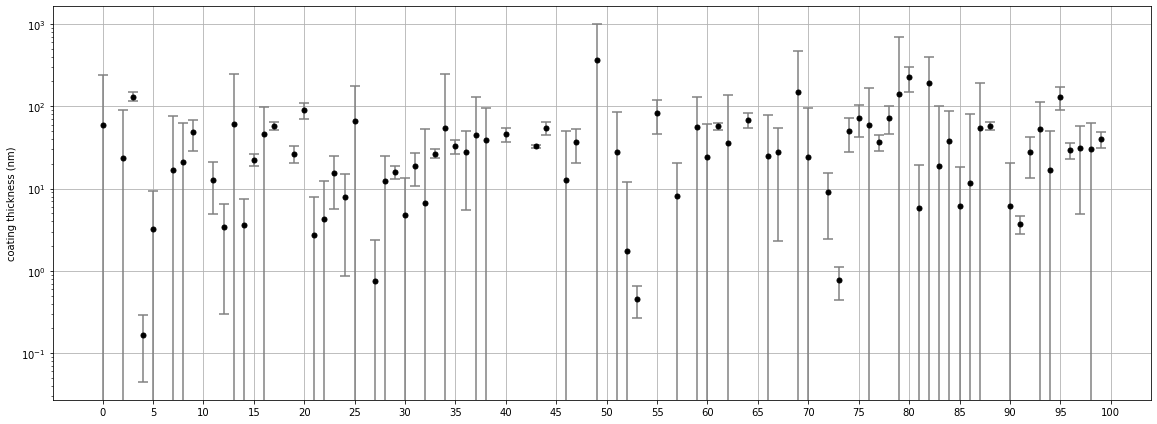

In [3]:
means = df_coating_stat_2ndngt.groupby('sce_index')['coating_mean'].mean()
error = df_coating_stat_2ndngt.groupby('sce_index')['coating_std'].mean()
x = df_coating_stat_2ndngt.groupby('sce_index')['sce_index'].mean()

fig, ax = plt.subplots(figsize = (10*1.618, 6))
ax.errorbar(x, means,
       yerr=error, fmt = '.k',
       ecolor='gray', elinewidth=1.5,
       ms = 10, capsize=5, capthick = 1.5)
ax.set_ylabel('coating thickness (nm)')
ax.set_xticks(np.arange(0,101,5))
# ax.set_xticklabels(sce_index)
ax.grid(True)
ax.set_yscale('log')

# Save the figure and show
plt.tight_layout()